<a href="https://colab.research.google.com/github/SandraP2004/Prueba1/blob/main/Proyecto_semestral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['1', '1000', '1000.1', '500', 'EST1'], dtype='object')


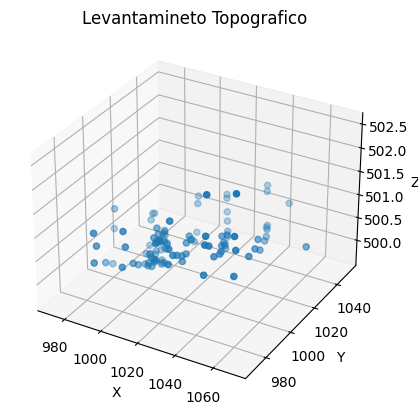

In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV en tu Google Drive
csv_file_path = '/content/drive/MyDrive/Programación/Proyecto semestral/Levantamiento.csv'

# Leer el archivo CSV usando pandas
data = pd.read_csv(csv_file_path)

# Mostrar los nombres de las columnas
print(data.columns)

# Crear una conexión a la base de datos SQLite (o crearla si no existe)
db_conn = sqlite3.connect('/content/drive/MyDrive/Programación/Proyecto semestral/Proyecto Semestral.db')

# Guardar los datos en una tabla en la base de datos SQLite
data.to_sql('Levantamiento', db_conn, if_exists='replace', index=False)

# Cerrar la conexión a la base de datos
db_conn.close()

# Volver a abrir la conexión para realizar consultas y graficar
db_conn = sqlite3.connect('/content/drive/MyDrive/Programación/Proyecto semestral/Proyecto Semestral.db')

# Consulta SQL para obtener los datos de la tabla
query = "SELECT `1000`, `1000.1`, `500` FROM Datos"

# Obtener los datos de la tabla en un DataFrame
result = pd.read_sql(query, db_conn)

# Cerrar la conexión a la base de datos
db_conn.close()

# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['1000'], result['1000.1'], result['500'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Levantamineto Topografico')
plt.show()